In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#train = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_train.csv') #original table
#test = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_test.csv')  # original table
turns = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_turns.csv') # original table
train = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/strain.csv') # modify table from sql
test = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/stest.csv') # modify table from sql 
game = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_games.csv') #original table
# turns = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/turns.csv') # modify table from sql 

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',30)

# Exploratory  Data Analysis

In [4]:
train.head(5) #turns.sample(10) #game.tail(10)

,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating
0,1,BetterBot,335,1637,stevy,429.0,1500
1,3,BetterBot,318,2071,davidavid,440.0,1811
2,4,BetterBot,478,1936,Inandoutworker,119.0,1473
3,5,STEEBot,427,1844,stevy,325.0,1500
4,6,STEEBot,427,2143,HivinD,378.0,2029


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50420 entries, 0 to 50419
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        50420 non-null  int64  
 1   Bot_name       50420 non-null  object 
 2   Bot_score      50420 non-null  int64  
 3   Bot_rating     50420 non-null  int64  
 4   player_name    50420 non-null  object 
 5   player_score   50419 non-null  float64
 6   player_rating  50420 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ MB


In [6]:
train.describe()

,game_id,Bot_score,Bot_rating,player_score,player_rating
count,50420.000000,50420.000000,50420.000000,50419.000000,50420.000000
mean,36365.899147,421.957438,1960.810809,376.101589,1790.409163
std,21019.501457,70.475216,200.434698,72.746498,229.722334
min,1.000000,162.000000,1349.000000,0.000000,1033.000000
25%,18141.250000,373.000000,1827.000000,331.000000,1582.000000
50%,36337.500000,417.000000,1991.000000,378.000000,1818.000000
75%,54622.250000,465.000000,2124.000000,423.000000,1982.000000
max,72773.000000,1132.000000,2377.000000,707.000000,2510.000000


In [7]:
train.describe(include=['object'])

,Bot_name,player_name
count,50420,50420
unique,4,1029
top,HastyBot,BB-8
freq,17346,6576


In [8]:
train.isnull().sum()

game_id          0
Bot_name         0
Bot_score        0
Bot_rating       0
player_name      0
player_score     1
player_rating    0
dtype: int64

In [9]:
train.duplicated().sum()

0

In [10]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [11]:
game.describe()

,game_id,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,72773.000000,72773.000000,72773.000000,72773.00000,72773.000000,72773.000000
mean,36387.000000,0.350734,1198.034230,0.22856,2.143707,484.069347
std,21007.899907,0.484859,713.185219,2.54802,2.989853,333.563128
min,1.000000,-1.000000,15.000000,0.00000,0.000000,7.962989
25%,18194.000000,0.000000,900.000000,0.00000,1.000000,250.172459
50%,36387.000000,0.000000,1200.000000,0.00000,1.000000,399.834150
75%,54580.000000,1.000000,1200.000000,0.00000,1.000000,633.424285
max,72773.000000,1.000000,3600.000000,60.00000,10.000000,4444.821645


In [12]:
game.describe(include=['object'])

,first,time_control_name,game_end_reason,created_at,lexicon,rating_mode
count,72773,72773,72773,72773,72773,72773
unique,1314,4,4,72194,4,2
top,STEEBot,regular,STANDARD,2022-09-20 15:59:19,CSW21,RATED
freq,12210,60282,67987,3,44594,54076


In [13]:
game.isnull().sum()

game_id                  0
first                    0
time_control_name        0
game_end_reason          0
winner                   0
created_at               0
lexicon                  0
initial_time_seconds     0
increment_seconds        0
rating_mode              0
max_overtime_minutes     0
game_duration_seconds    0
dtype: int64

In [14]:
game.duplicated().sum()

0

In [15]:
turns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB


In [16]:
turns.describe()

,game_id,turn_number,points,score
count,2.005498e+06,2.005498e+06,2.005498e+06,2.005498e+06
mean,3.640032e+04,1.453798e+01,2.900326e+01,2.270914e+02
std,2.100559e+04,8.434285e+00,2.210145e+01,1.343110e+02
min,1.000000e+00,1.000000e+00,-2.210000e+02,-6.400000e+01
25%,1.820800e+04,7.000000e+00,1.600000e+01,1.130000e+02
50%,3.640100e+04,1.400000e+01,2.400000e+01,2.240000e+02
75%,5.460900e+04,2.100000e+01,3.600000e+01,3.320000e+02
max,7.277300e+04,7.500000e+01,3.110000e+02,1.171000e+03


In [17]:
turns.describe(include=['object'])

,nickname,rack,location,move,turn_type
count,2005498,1936108,1873259,2005044,2005103
unique,1471,626752,418,356847,7
top,BetterBot,I,15A,--,Play
freq,360931,2900,24190,14302,1872864


In [18]:
turns.isnull().sum()

game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64

In [19]:
turns.duplicated().sum()

0

Panda profiling provide an overview of the dataset by providing univariant describtion and information of each feature along with correlation with other feature in dataset

In [20]:
# from pandas_profiling import ProfileReport

In [21]:
# prof = ProfileReport(turns) # game # turns #train
# prof.to_file(output_file= "C:/Users/ankro/OneDrive/Desktop/turn EDA.html") # game # turns #train

# Overall Data Frame work

After going through the data few point is clear that the turn and game table contain both the data from train and test player. Hence we need to segregrate them so that in model training it will not cause problem

In [22]:
df= pd.merge(train,game,how='left',left_on =['game_id'],right_on=['game_id'])
df.rename(columns = {'winner':'first_move_win/not','first':'first_move_by'}, inplace = True)

In [23]:
df_1= pd.merge(test,game,how='left',left_on =['game_id'],right_on=['game_id'])
df_1.rename(columns = {'winner':'first_move_win/not','first':'first_move_by'}, inplace = True)

In [24]:
train_df = pd.merge(df,turns,how='left',left_on =['game_id'],right_on=['game_id'])
print(train_df.shape)

(1391588, 26)


In [25]:
test_df = pd.merge(df_1,turns,how='left',left_on =['game_id'],right_on=['game_id'])
test_df.shape

(614312, 26)

In [26]:
print('player in train dataframe =',len(train_df['game_id'].unique()),'player in train table =',len(train['game_id'].unique()))
train_df.head(5)

player in train dataframe = 50410 player in train table = 50410


,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating,first_move_by,time_control_name,game_end_reason,first_move_win/not,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,BetterBot,335,1637,stevy,429.0,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,BetterBot,335,1637,stevy,429.0,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,BetterBot,335,1637,stevy,429.0,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,BetterBot,335,1637,stevy,429.0,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,BetterBot,335,1637,stevy,429.0,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [27]:
print('player in test dataframe =',len(test_df['game_id'].unique()),'player in test table =',len(test['game_id'].unique()))
test_df.head(5)

player in test dataframe = 22363 player in test table = 22363


,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating,first_move_by,time_control_name,game_end_reason,first_move_win/not,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,location,move,points,score,turn_type
0,2,BetterBot,401,2000.0,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,1,Super,AFINRTV,8D,FAINT,24,24,Play
1,2,BetterBot,401,2000.0,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,2,BetterBot,EEEEGIT,G6,GE.IE,8,8,Play
2,2,BetterBot,401,2000.0,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,3,Super,AAERTVW,F10,WAVER,34,58,Play
3,2,BetterBot,401,2000.0,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,4,BetterBot,EEHNNOT,14B,ENTH.ONE,72,80,Play
4,2,BetterBot,401,2000.0,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,5,Super,AABEFTY,15G,FY,44,102,Play


   # Feature Engineering

Changing DataType of the Created at column so that we can handle in datetime format rather than string format

In [28]:
train_df['created_at']=pd.to_datetime(train_df['created_at'])
test_df['created_at']=pd.to_datetime(test_df['created_at'])

# Handling Missing Values

Finding all the missing data in the traina and test dataset

In [29]:
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
missing_train = pd.DataFrame({'NaN_count_train': missing_train, 'NaN_percentage_train': missing_train / len(train_df)})
missing_test = pd.DataFrame({'NaN_count_test': missing_test, 'NaN_percentage_test': missing_test / len(test_df)})
missing=pd.concat([missing_train,missing_test],axis=1)
missing

,NaN_count_train,NaN_percentage_train,NaN_count_test,NaN_percentage_test
game_id,0,0.000000,0,0.000000
Bot_name,0,0.000000,0,0.000000
Bot_score,0,0.000000,0,0.000000
Bot_rating,0,0.000000,103,0.000168
player_name,0,0.000000,0,0.000000
player_score,29,0.000021,0,0.000000
player_rating,0,0.000000,614209,0.999832
first_move_by,0,0.000000,0,0.000000
time_control_name,0,0.000000,0,0.000000
game_end_reason,0,0.000000,0,0.000000


Filtering all columns name having missing values in train dataset

In [30]:
missing[missing['NaN_count_train']>0][['NaN_count_train','NaN_percentage_train']]

,NaN_count_train,NaN_percentage_train
player_score,29,0.000021
rack,48217,0.034649
location,88564,0.063642
move,295,0.000212
turn_type,253,0.000182


 eleminating all the rows containing null in player_score columns because only .000021 is missing

In [31]:
train_df.dropna(subset=['player_score'],inplace=True)

Now we need to understand the Game to Handle the missing data

In [32]:
missing[missing['NaN_count_test']>0][['NaN_count_test','NaN_percentage_test']]

,NaN_count_test,NaN_percentage_test
Bot_rating,103,0.000168
player_rating,614209,0.999832
rack,21184,0.034484
location,43727,0.071180
move,159,0.000259
turn_type,142,0.000231


Here we have 103 value which is missing so we need to handle them seperately. and on invetigating we find that tere is one bot not present in train dataset

In [33]:
print('All unique bot in train set',train['Bot_name'].unique())
print('All unique bot in test set',test['Bot_name'].unique())

All unique bot in train set ['BetterBot' 'STEEBot' 'HastyBot' 'MasterBot']
All unique bot in test set ['BetterBot' 'STEEBot' 'HastyBot' 'Arkilabot']


In [34]:
test['Bot_rating'].fillna(value=test['Bot_rating'].mean,inplace=True)

# Handeling Category Data

In [35]:
train_df.describe(include=['object'])

,Bot_name,player_name,first_move_by,time_control_name,game_end_reason,lexicon,rating_mode,nickname,rack,location,move,turn_type
count,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1343342,1303001,1391264,1391306
unique,4,1029,915,4,4,4,2,1031,507123,418,279085,7
top,BetterBot,BB-8,BetterBot,regular,STANDARD,CSW21,RATED,BetterBot,I,15A,QI,Play
freq,494744,185590,246528,1197140,1321804,837601,985814,247412,2054,16788,10081,1302748


Analys the category column with respect to the score and rating of player and bot

In [36]:
df_group=train_df.groupby(by='rating_mode').aggregate({'Bot_score':['count','mean','sum','max'],'player_score':['mean','sum','max'],'Bot_rating':['mean','sum','max'],'player_rating':['mean','sum','max']})
df_group

Bot_score                              player_score               \
                count        mean        sum   max         mean          sum   
rating_mode                                                                    
CASUAL         405745  411.352285  166904133  1132   365.482532  148292710.0   
RATED          985814  424.759306  418733670   930   376.414650  371074832.0   

                     Bot_rating                   player_rating              \
               max         mean         sum   max          mean         sum   
rating_mode                                                                   
CASUAL       672.0  1828.382819   741857187  2372   1618.723173   656788834   
RATED        707.0  2004.746234  1976306904  2377   1848.139875  1821922163   

                   
              max  
rating_mode        
CASUAL       2510  
RATED        2404

In [37]:
df_group['Bot_rating']['mean']/df_group['player_rating']['mean']

rating_mode
CASUAL    1.129522
RATED     1.084737
Name: mean, dtype: float64

 using ordinal encoder to encode the category columns

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[
    ['ultrablitz','blitz','rapid','regular'],
    ['CONSECUTIVE_ZEROES','TIME','RESIGNED','STANDARD'],
    ['CSW21','NSWL20','NWL20','ECWL'],
    ['CASUAL','RATED']
])

In [39]:
oe.fit(train_df[['time_control_name','game_end_reason','lexicon','rating_mode']])
train_df[['time_control_name','game_end_reason','lexicon','rating_mode']] = oe.transform(train_df[['time_control_name','game_end_reason','lexicon','rating_mode']])

In [40]:
test_df[['time_control_name','game_end_reason','lexicon','rating_mode']] = oe.transform(test_df[['time_control_name','game_end_reason','lexicon','rating_mode']])

Turn_type in scrabble game is what turn player made like play / pass / timeout .so if null present mean player didn't make any move thus sount as zero or null

In [41]:
train_df['turn_type'].fillna('Null_value',inplace=True)
test_df['turn_type'].fillna('Null_value',inplace=True)

In [42]:
train_df.groupby(by='turn_type').aggregate({'Bot_score':['mean','sum','max'],'player_score':['mean','sum','max'],'Bot_rating':['mean','sum','max'],'player_rating':['mean','sum','max']})

Bot_score                  player_score                      \
                     mean        sum   max         mean          sum    max   
turn_type                                                                     
Challenge      492.673774     231064   866   271.628998     127394.0  479.0   
End            422.602046   20159808  1132   381.430195   18195746.0  707.0   
Exchange       426.940024   14115918  1132   352.650092   11659670.0  679.0   
Null_value     428.984190     108533   647   351.320158      88884.0  505.0   
Pass           494.245579    2459366  1132   278.245780    1384551.0  663.0   
Play           420.335036  547590628  1132   373.948068  487160098.0  707.0   
Six-Zero Rule  374.453552     137050   516   349.666667     127978.0  541.0   
Timeout        421.937374     835436   834   314.758081     623221.0  589.0   

                Bot_rating                   player_rating                    
                      mean         sum   max          mean         sum   max  
turn_type                                                                     
Challenge      2090.744136      980559  2278   1613.573561      756766  2114  
End            1957.237129    93368040  2377   1792.864141    85526791  2510  
Exchange       1941.943199    64206468  2372   1749.891540    57856664  2510  
Null_value     1984.067194      501969  2322   1756.347826      444356  2175  
Pass           1958.609727     9746042  2360   1697.440314     8446463  2292  
Play           1953.301190  2544659219  2377   1782.062555  2321578429  2510  
Six-Zero Rule  1841.163934      673866  2321   1673.994536      612682  2208  
Timeout        2034.307071     4027928  2364   1762.043434     3488846  2289

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)
ohe.fit_transform(train_df[['turn_type']])

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [44]:
df=pd.DataFrame(ohe.fit_transform(train_df[['turn_type']]),columns=['turn1','turn2','turn3','turn4','turn5','turn6','turn7'])
train_df=pd.concat([train_df,df],axis=1)

In [45]:
df=pd.DataFrame(ohe.fit_transform(test_df[['turn_type']]),columns=['turn1','turn2','turn3','turn4','turn5','turn6','turn7'])
test_df=pd.concat([test_df,df],axis=1)

In [46]:
train_df.drop(['turn_type'],axis=1,inplace=True)
test_df.drop(['turn_type'],axis=1,inplace=True)

As we know in scabble game there are various words which can be formed during the game in progress so we need a certain parameter to measure all this

In [47]:
train_df['rack']= train_df['rack'].str.len()
train_df['move']= train_df['move'].str.len()
test_df['rack']= test_df['rack'].str.len()
test_df['move']= test_df['move'].str.len()

As we know that total block in scrabble game is of 15X15 so converting in terms of x and y axis

In [48]:
train_df['location_y'] = train_df["location"].str.extract('(\d+)')
train_df['location_y'] = pd.to_numeric(train_df['location_y'])
train_df['location_x'] = train_df["location"].str.extract('([A-Z])')
train_df['location_x'].replace(to_replace=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'],
                            value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)
train_df.drop(columns='location',axis=1,inplace=True)

In [49]:
test_df['location_y'] = test_df["location"].str.extract('(\d+)')
test_df['location_y'] = pd.to_numeric(test_df['location_y'])
test_df['location_x'] = test_df["location"].str.extract('([A-Z])')
test_df['location_x'].replace(to_replace=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'],
                          value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)
test_df.drop(columns='location',axis=1,inplace=True)

In [50]:
# np.unique(train_df[train_df['turn_type'].isna()][''],return_counts=True)

move in scrabble game is define as the what letter you put on board so if player don't play that mean zero word placed

In [51]:
train_df['move'].fillna(value=0,inplace=True)
test_df['move'].fillna(value=0,inplace=True)

Rack in scrabbler game is collection of random alphabets from which we have to select and place on board to make a meaningfull word. so when rack is null which mean the player has succesfully placed all alphabets on board. so here we will count null as zero

In [52]:
train_df['rack'].fillna(value=0,inplace=True)
test_df['rack'].fillna(value=0,inplace=True)

In scrabble game location also has value that decide the score so if not filled it may be no move made or pass or any resaon to left that session

In [53]:
train_df['location_y'].fillna(value=0,inplace=True)
train_df['location_x'].fillna(value=0,inplace=True)
test_df['location_x'].fillna(value=0,inplace=True)
test_df['location_y'].fillna(value=0,inplace=True)

In [54]:
# df_sort=train_df.sort_values(by=['player_name','created_at'])
# df_sort

# Handeling Outlier data

Viewing the data having outlier in column and how its effecting the player rating in the dataset

C:\Users\ankro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

C:\Users\ankro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

C:\Users\ankro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

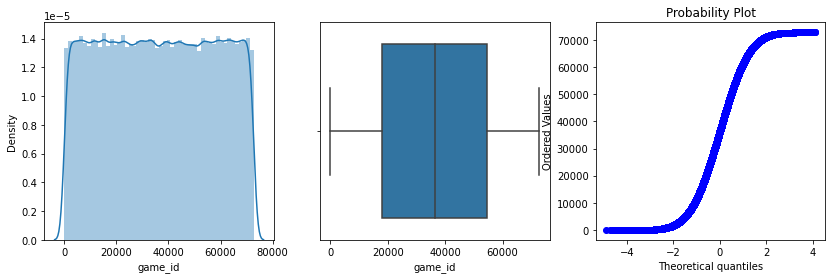

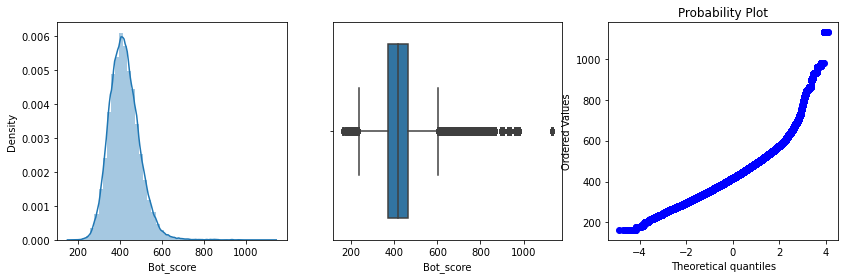

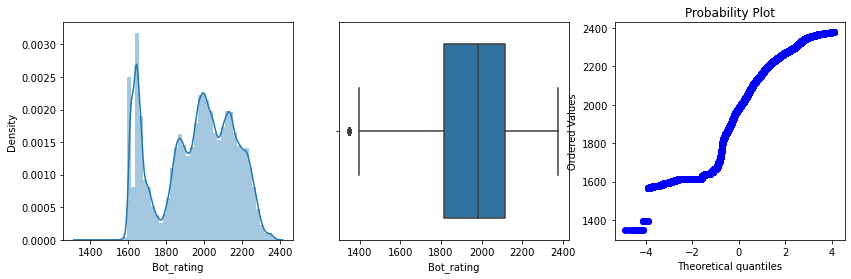

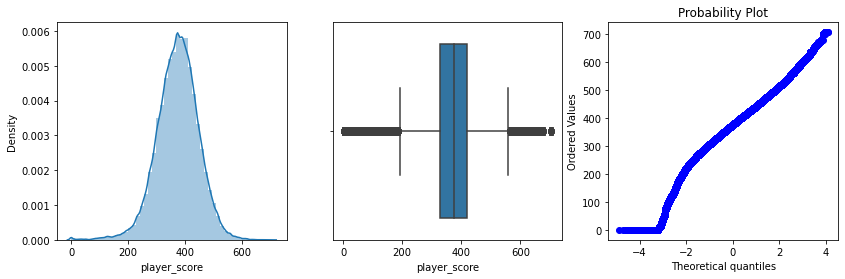

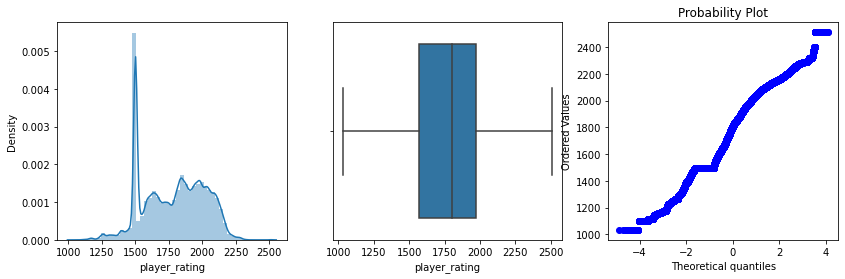

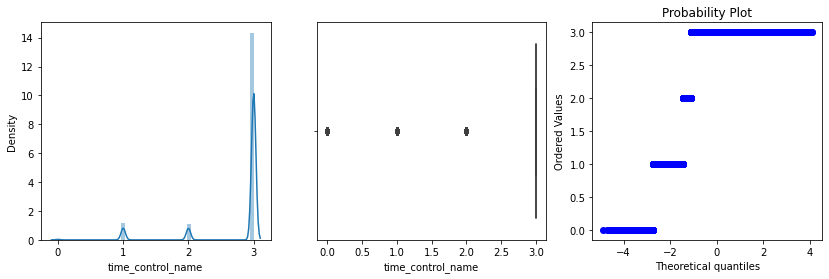

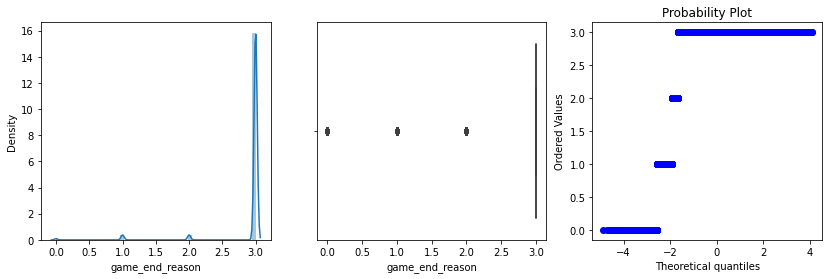

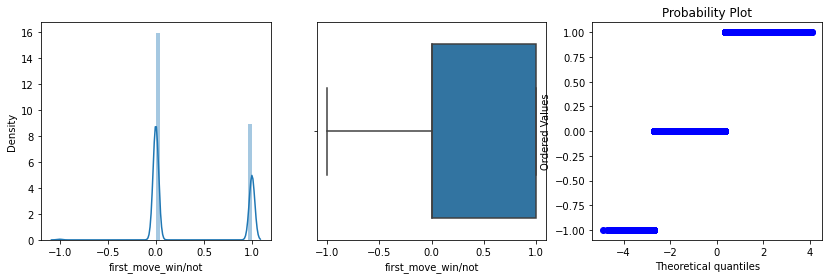

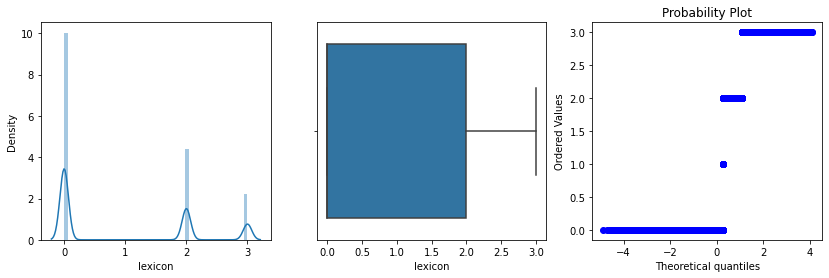

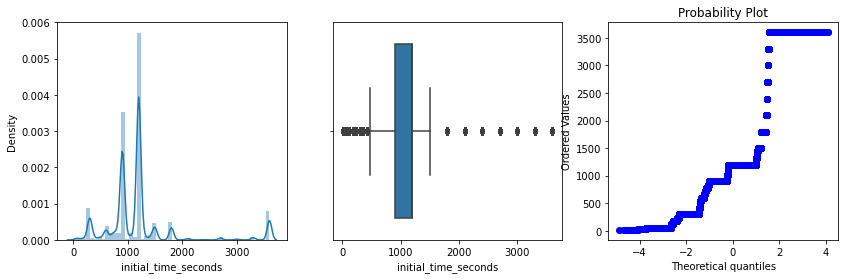

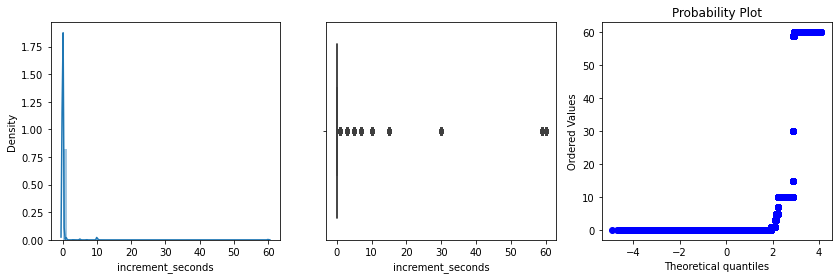

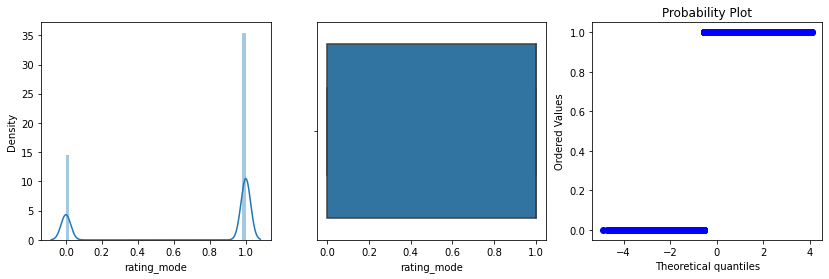

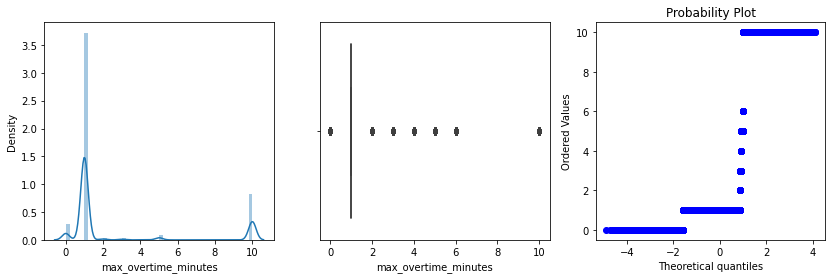

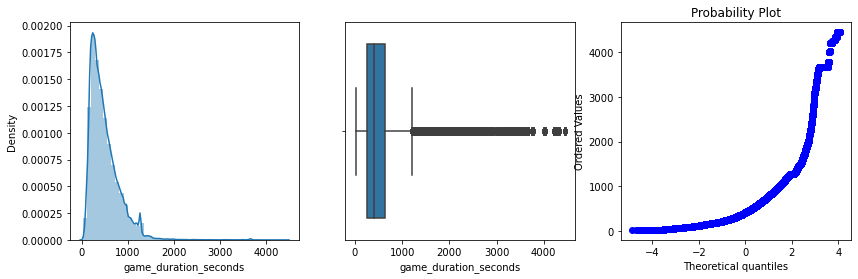

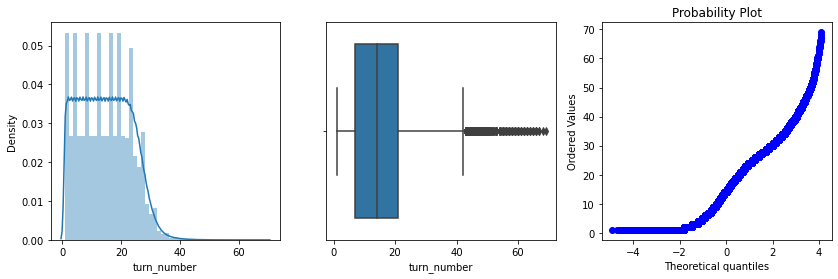

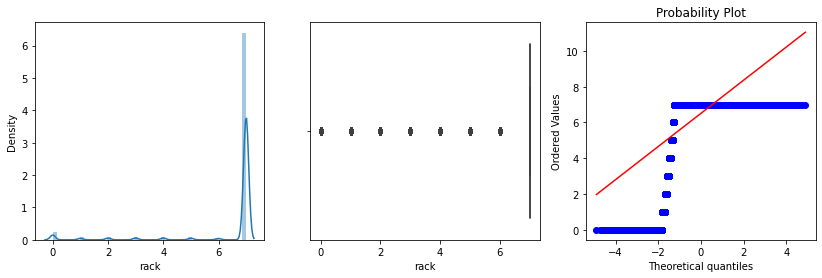

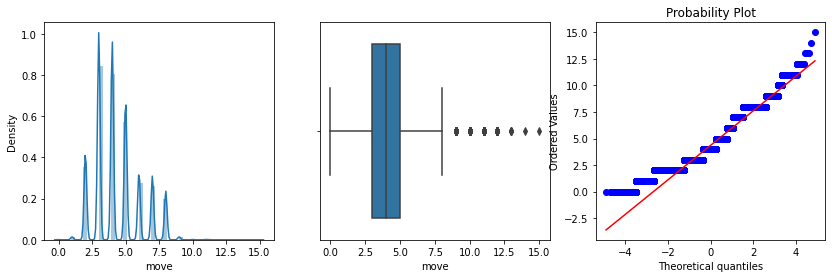

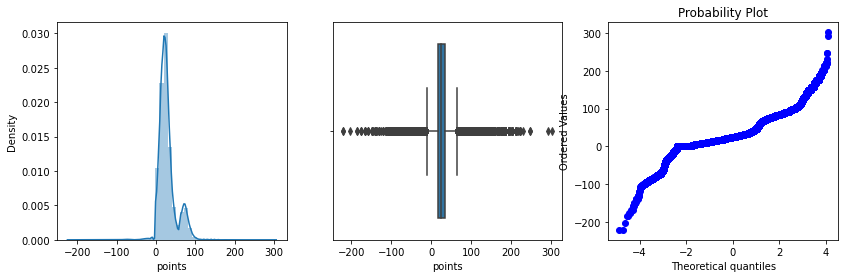

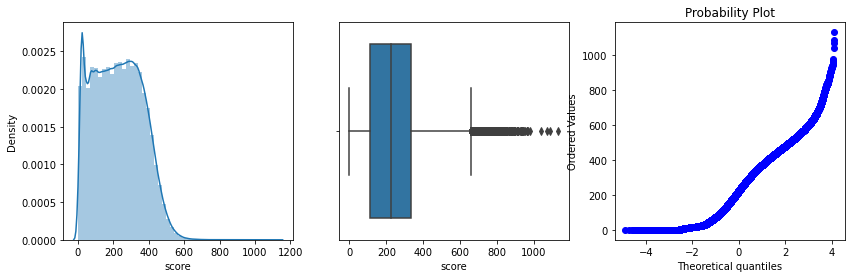

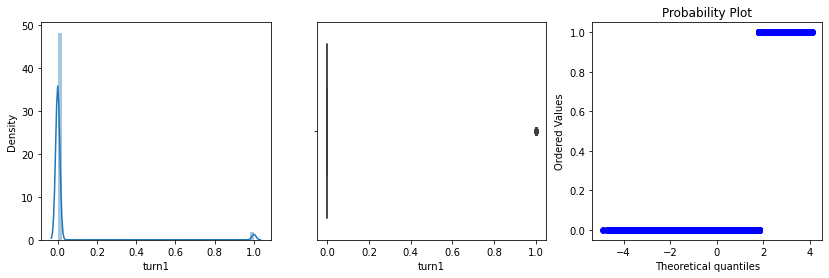

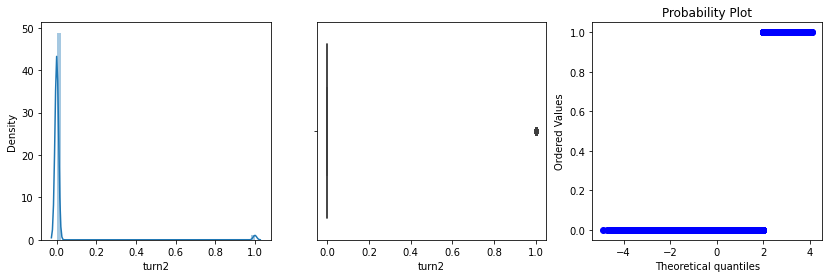

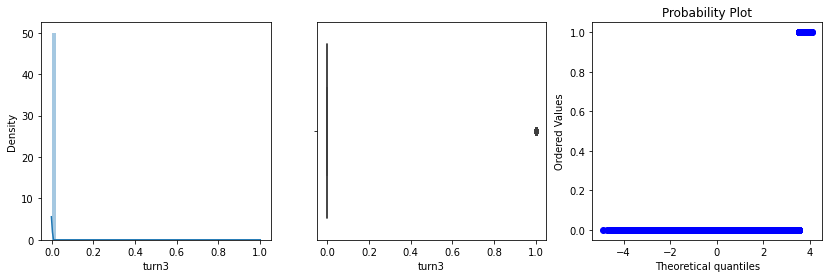

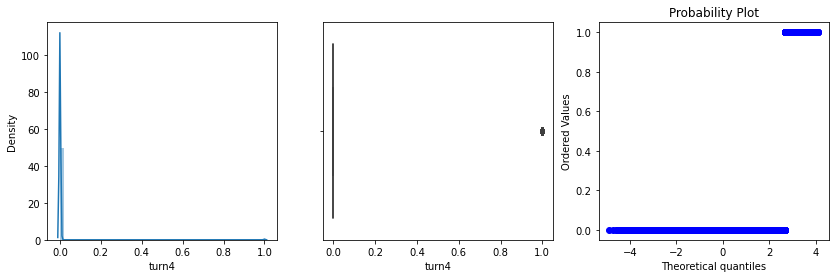

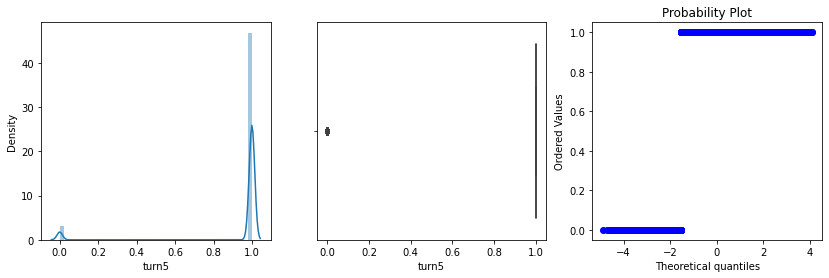

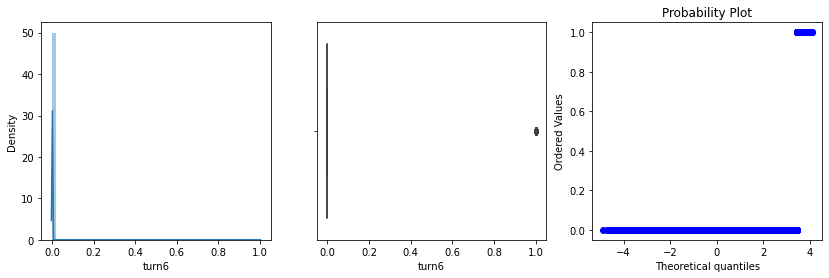

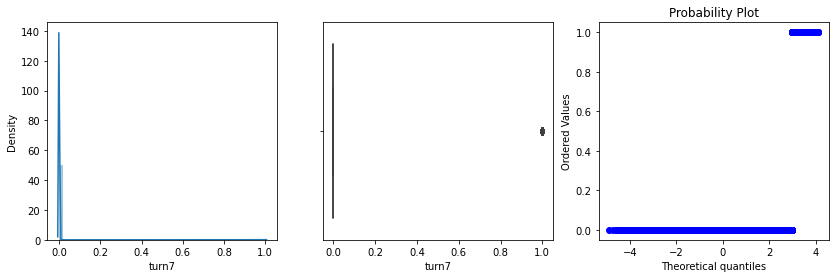

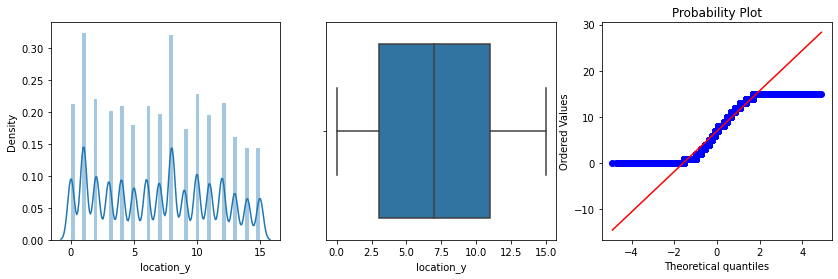

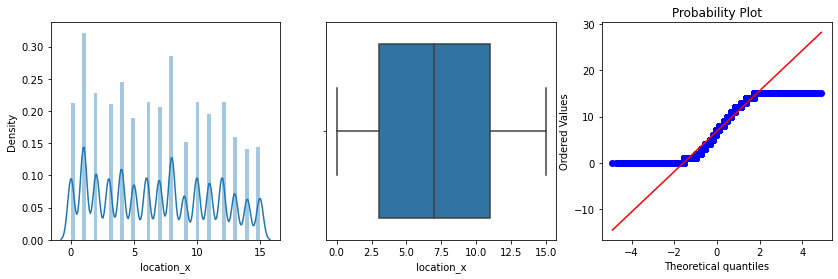

In [55]:
for col in train_df.describe(exclude=['object','datetime']).columns:
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(train_df[col])
    plt.subplot(132)
    sns.boxplot(train_df[col])
    plt.subplot(133)
    stats.probplot(train_df[col],dist='norm',plot=plt)

As we jnow there are outlier data in the dataset so we will use Robust scaler which work on quantile range and decrease the affect of outlier

# Final Dataset

In [56]:
df_new= train_df.groupby(by=['game_id','nickname'],as_index= False).aggregate({'game_id':'mean',
    'Bot_score':'mean','Bot_rating':'mean','player_score':'mean','player_rating':'mean',
    'time_control_name':'mean','game_end_reason':'mean','lexicon':'mean','initial_time_seconds':'mean',
    'increment_seconds':'mean','rating_mode':'mean','max_overtime_minutes':'mean','game_duration_seconds':'mean',
    'turn_number':'count','rack':['min','mean'],'move':['mean','max'],'points':['mean','sum'],'score':['mean','sum'],
    'turn1':['sum'],'turn2':['sum'],'turn3':['sum'],'turn4':['sum'],'turn5':['sum'],'turn6':['sum'],'turn7':['sum']
})

In [57]:
df_new.columns = df_new.columns.droplevel(1) +"_" +df_new.columns.droplevel(0)

In [58]:
df_new = pd.merge(df_new,df_new,how='inner',left_on =['game_id_mean'],right_on=['game_id_mean'])

In [59]:
df_new=df_new[(df_new['nickname__x'].str.contains('Bot')) & (df_new['nickname__x']!=df_new['nickname__y'])]

In [60]:
x_train=df_new.drop(['nickname__x','player_rating_mean_x','game_id_mean','nickname__y','Bot_score_mean_y','Bot_rating_mean_y','player_score_mean_y',
            'player_rating_mean_y','time_control_name_mean_y','game_end_reason_mean_y','lexicon_mean_y',
            'initial_time_seconds_mean_y','increment_seconds_mean_y','rating_mode_mean_y','max_overtime_minutes_mean_y',
            'game_duration_seconds_mean_y'],axis=1)
x_train.head(3)

,Bot_score_mean_x,Bot_rating_mean_x,player_score_mean_x,time_control_name_mean_x,game_end_reason_mean_x,lexicon_mean_x,initial_time_seconds_mean_x,increment_seconds_mean_x,rating_mode_mean_x,max_overtime_minutes_mean_x,game_duration_seconds_mean_x,turn_number_count_x,rack_min_x,rack_mean_x,move_mean_x,move_max_x,points_mean_x,points_sum_x,score_mean_x,score_sum_x,turn1_sum_x,turn2_sum_x,turn3_sum_x,turn4_sum_x,turn5_sum_x,turn6_sum_x,turn7_sum_x,turn_number_count_y,rack_min_y,rack_mean_y,move_mean_y,move_max_y,points_mean_y,points_sum_y,score_mean_y,score_sum_y,turn1_sum_y,turn2_sum_y,turn3_sum_y,turn4_sum_y,turn5_sum_y,turn6_sum_y,turn7_sum_y
1,335.0,1637.0,429.0,3.0,3.0,2.0,1200.0,0.0,0.0,1.0,674.844274,13,4.0,6.769231,4.615385,8.0,25.769231,335.0,182.230769,2369.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,14,0.0,6.071429,3.857143,7.0,30.642857,429.0,256.500000,3591.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0
5,318.0,2071.0,440.0,3.0,3.0,0.0,900.0,0.0,1.0,5.0,492.268262,13,7.0,7.000000,4.384615,8.0,24.461538,318.0,155.076923,2016.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,14,0.0,6.214286,4.357143,7.0,31.428571,440.0,231.714286,3244.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0
9,478.0,1936.0,119.0,3.0,2.0,0.0,3600.0,0.0,0.0,1.0,350.861141,15,7.0,7.000000,5.066667,8.0,31.866667,478.0,228.666667,3430.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,14,7.0,7.000000,2.928571,7.0,8.500000,119.0,85.000000,1190.0,0.0,2.0,0.0,0.0,12.0,0.0,0.0


In [61]:
y_train=df_new['player_rating_mean_x']
y_train.head(3)

1    1500.0
5    1811.0
9    1473.0
Name: player_rating_mean_x, dtype: float64

In [62]:
df_new= test_df.groupby(by=['game_id','nickname'],as_index= False).aggregate({'game_id':'mean',
    'Bot_score':'mean','Bot_rating':'mean','player_score':'mean','player_rating':'mean',
    'time_control_name':'mean','game_end_reason':'mean','lexicon':'mean','initial_time_seconds':'mean',
    'increment_seconds':'mean','rating_mode':'mean','max_overtime_minutes':'mean','game_duration_seconds':'mean',
    'turn_number':'count','rack':['min','mean'],'move':['mean','max'],'points':['mean','sum'],'score':['mean','sum'],
    'turn1':['sum'],'turn2':['sum'],'turn3':['sum'],'turn4':['sum'],'turn5':['sum'],'turn6':['sum'],'turn7':['sum']
})

In [63]:
df_new.columns = df_new.columns.droplevel(1) +"_" + df_new.columns.droplevel(0)

In [64]:
df_new = pd.merge(df_new,df_new,how='inner',left_on =['game_id_mean'],right_on=['game_id_mean'])

In [65]:
df_new=df_new[(df_new['nickname__x'].str.contains('Bot')) & (df_new['nickname__x']!=df_new['nickname__y'])]

In [66]:
x_test=df_new.drop(['nickname__x','player_rating_mean_x','game_id_mean','nickname__y','Bot_score_mean_y','Bot_rating_mean_y','player_score_mean_y',
            'player_rating_mean_y','time_control_name_mean_y','game_end_reason_mean_y','lexicon_mean_y',
            'initial_time_seconds_mean_y','increment_seconds_mean_y','rating_mode_mean_y','max_overtime_minutes_mean_y',
            'game_duration_seconds_mean_y'],axis=1)

In [67]:
x_test.head(5)

,Bot_score_mean_x,Bot_rating_mean_x,player_score_mean_x,time_control_name_mean_x,game_end_reason_mean_x,lexicon_mean_x,initial_time_seconds_mean_x,increment_seconds_mean_x,rating_mode_mean_x,max_overtime_minutes_mean_x,game_duration_seconds_mean_x,turn_number_count_x,rack_min_x,rack_mean_x,move_mean_x,move_max_x,points_mean_x,points_sum_x,score_mean_x,score_sum_x,turn1_sum_x,turn2_sum_x,turn3_sum_x,turn4_sum_x,turn5_sum_x,turn6_sum_x,turn7_sum_x,turn_number_count_y,rack_min_y,rack_mean_y,move_mean_y,move_max_y,points_mean_y,points_sum_y,score_mean_y,score_sum_y,turn1_sum_y,turn2_sum_y,turn3_sum_y,turn4_sum_y,turn5_sum_y,turn6_sum_y,turn7_sum_y
1,401.0,2000.0,488.0,3.0,3.0,0.0,3600.0,0.0,1.0,1.0,364.214418,12,6.0,6.916667,5.250000,8.0,33.416667,401,229.250000,2751,0.0,0.0,0.0,0.0,12.0,0.0,0.0,14,0.0,6.500000,4.357143,8.0,34.857143,488,282.285714,3952,1.0,1.0,0.0,1.0,11.0,0.0,0.0
6,377.0,2082.0,379.0,3.0,3.0,0.0,1260.0,0.0,1.0,1.0,385.599607,14,0.0,6.500000,4.571429,9.0,26.928571,377,186.500000,2611,1.0,0.0,0.0,0.0,13.0,0.0,0.0,13,7.0,7.000000,3.846154,7.0,29.153846,379,185.230769,2408,0.0,1.0,0.0,0.0,12.0,0.0,0.0
9,334.0,1829.0,462.0,3.0,3.0,2.0,1200.0,0.0,0.0,1.0,501.739156,15,0.0,6.333333,3.933333,7.0,22.266667,334,186.066667,2791,1.0,1.0,0.0,0.0,13.0,0.0,0.0,14,5.0,6.857143,4.214286,8.0,33.000000,462,247.571429,3466,0.0,1.0,0.0,0.0,13.0,0.0,0.0
14,403.0,2136.0,359.0,3.0,3.0,0.0,900.0,0.0,1.0,1.0,293.253051,14,6.0,6.928571,4.214286,7.0,28.785714,403,227.785714,3189,0.0,0.0,0.0,0.0,14.0,0.0,0.0,15,0.0,6.266667,4.066667,8.0,23.933333,359,244.800000,3672,1.0,0.0,0.0,0.0,14.0,0.0,0.0
17,453.0,2258.0,456.0,3.0,3.0,0.0,1200.0,0.0,1.0,1.0,203.963230,12,0.0,6.333333,5.250000,8.0,37.750000,453,280.250000,3363,1.0,0.0,0.0,0.0,11.0,0.0,0.0,11,7.0,7.000000,4.454545,8.0,41.454545,456,269.272727,2962,0.0,0.0,0.0,0.0,11.0,0.0,0.0


In [68]:
df_new['game_id']=df_new['game_id_mean'].astype(int)

Finding the corelation of the data in the dataframe

In [89]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_train,y_train,test_size=0.15)

# Scaling the data

In [70]:
from sklearn.preprocessing import RobustScaler  #StandardScaler
scale= RobustScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train), columns=list(x_train.columns))

In [71]:
x_train.shape

(50419, 43)

In [72]:
x_test = pd.DataFrame(scale.fit_transform(x_test), columns=list(x_test.columns))

In [73]:
x_test.shape

(22363, 43)

# Model Validating

In [74]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn.linear_model import Lasso
ls= Lasso()
from sklearn.linear_model import Ridge
re= Ridge()
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
from sklearn.linear_model import ElasticNet
enr= ElasticNet()
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
from sklearn.svm import SVR
svr=SVR() 
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
estimator =[('lnr_rgr',lr),('lss_rgr',ls),('rde_rgr',re),('dtr_rgr',dtr),('els_rgr',enr),('rfg_rgr',rfg),('knr_rgr',knr),('svr_rgr',svr),('gbr_rgr',gbr)]
for est in estimator:
    score = cross_val_score(est[1],x_train,y_train,scoring='r2',cv=5,n_jobs=-1)
    print(est[0],np.round(np.mean(score),2))

lnr_rgr 0.63
lss_rgr 0.63
rde_rgr 0.63
dtr_rgr 0.55
els_rgr 0.54
rfg_rgr 0.78
knr_rgr 0.65
svr_rgr 0.6
gbr_rgr 0.72


# Feature selection

In [77]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [78]:
forward_feature_selection = SequentialFeatureSelector(lr,k_features=10,forward=True,scoring='r2',cv=3,verbose=2,n_jobs=-1)
feature=forward_feature_selection.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    2.5s finished

[2022-12-15 16:06:48] Features: 1/10 -- score: 0.45425836504166545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.3s finished

[2022-12-15 16:06:48] Features: 2/10 -- score: 0.534552632623742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.3s finished

[2022-12-15 16:06:49] Features: 3/10 -- score: 0.573998429197868[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_job

In [79]:
feature.k_feature_names_

('Bot_rating_mean_x',
 'player_score_mean_x',
 'time_control_name_mean_x',
 'lexicon_mean_x',
 'initial_time_seconds_mean_x',
 'rating_mode_mean_x',
 'game_duration_seconds_mean_x',
 'turn_number_count_x',
 'move_mean_y',
 'move_max_y')

lnr/lasso/ridge/elastic_regression  'Bot_score_x','Bot_rating_x','player_score_x','time_control_name_x','lexicon_x','initial_time_seconds_x','rating_mode_x','game_duration_seconds_x','turn_number_x','rack_x'

decession tree 'Bot_rating_x','time_control_name_x','lexicon_x','initial_time_seconds_x','increment_seconds_x','rating_mode_x','max_overtime_minutes_x','turn3_x','turn3_y',

Random Forest 'Bot_rating_x','player_score_x','lexicon_x','initial_time_seconds_x','rating_mode_x','max_overtime_minutes_x','game_duration_seconds_x','move_x','turn_number_y','move_y'

Gradient Boost 'Bot_score_x','Bot_rating_x','player_score_x','lexicon_x','initial_time_seconds_x','rating_mode_x','game_duration_seconds_x','turn_number_y','points_y','turn6_y'


Finding the Best parameter combination to get good result by using Grid search and Random search 

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {  
    'fit_intercept':[True,False],
    'normalize':[False,True],
    'positive':[False,True]
}

In [82]:
reg = GridSearchCV(lr,param_grid=param_grid,n_jobs=-1)
reg.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [False, True],
                         'positive': [False, True]})

In [83]:
print(reg.best_score_)
dict_ls = reg.best_params_

0.6327492660757403


In [84]:
dict_ls

{'fit_intercept': True, 'normalize': False, 'positive': False}

Elastic Net 'alpha': 0.01, 'l1_ratio': 0.99, 'max_iter': 1000, 'random_state': 42, 'selection': 'cyclic', 'warm_start': True

LASSO 'alpha': 0.01, 'max_iter': 1000, 'random_state': 42

random forest 'criterion': 'mse','max_depth': 5000, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None,

Linear 'fit_intercept': True, 'normalize': False, 'positive': False

bagging 'bootstrap': True,'bootstrap_features': False, 'n_estimators': 50, 'random_state': None, 'warm_start': True

Ada Boost 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50, 'random_state': None

Metric for measuring the error

In [85]:
from sklearn.metrics import r2_score,mean_squared_error

Ensemble Voting

In [86]:
vot_base_model= [
    ('lss_rgr',Lasso(alpha=0.01,max_iter= 2000,random_state=42)),
    ('dtr_rgr',DecisionTreeRegressor()),
    ('rfg_rgr',RandomForestRegressor(criterion= 'mse',max_depth= 5000,max_features= None,min_samples_leaf= 2, 
                                     min_samples_split= 3,min_weight_fraction_leaf= 0.0, random_state= None)),
    ('gbr_rgr',GradientBoostingRegressor())
]

In [87]:
from sklearn.ensemble import VotingRegressor
vtg_rgr = VotingRegressor(vot_base_model)

In [90]:
vtg_rgr.fit(x_train1,y_train1)

VotingRegressor(estimators=[('lss_rgr',
                             Lasso(alpha=0.01, max_iter=2000, random_state=42)),
                            ('dtr_rgr', DecisionTreeRegressor()),
                            ('rfg_rgr',
                             RandomForestRegressor(max_depth=5000,
                                                   max_features=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=3)),
                            ('gbr_rgr', GradientBoostingRegressor())])

In [91]:
y_pred_vot=vtg_rgr.predict(x_test1)

In [92]:
score=r2_score(y_test1,y_pred_vot)
print(score)
mse=mean_squared_error(y_test1,y_pred_vot,squared=False)
mse

0.741607247951102


116.11299430328717

Predict Value on Kaggle test data score of 123 obtain

In [93]:
# vtg_rgr.fit(x_train,y_train)
# y_pred =vtg_rgr.predict(x_test)

In [94]:
#df_new['rating']=y_pred
#df= df_new[['game_id','rating']]
#df.to_csv("C:/Users/ankro/OneDrive/Desktop/scrabble.csv",index=False)

Ensemble Bagging

In [95]:
from sklearn.ensemble import BaggingRegressor
bag_rgr = BaggingRegressor()

In [96]:
bag_rgr = BaggingRegressor(bootstrap= True,bootstrap_features= False,n_estimators= 50, random_state= None,warm_start= True)

In [97]:
bag_rgr.fit(x_train1,y_train1)

BaggingRegressor(n_estimators=50, warm_start=True)

In [98]:
y_pred_bagg=bag_rgr.predict(x_test1)

In [99]:
score=r2_score(y_test1,y_pred_bagg)
print(score)
mse=mean_squared_error(y_test1,y_pred_bagg,squared=False)
mse

0.776460066315347


107.99862341392071

Predict Value on Kaggle test data score of 112 obtain

In [100]:
# bag_rgr.fit(x_train,y_train)
# y_pred=bag_rgr.predict(x_test)

In [101]:
# df_new['rating']=y_pred
# df= df_new[['game_id','rating']]
# df.to_csv("C:/Users/ankro/OneDrive/Desktop/scrabble.csv",index=False)

Ensemble Boosting

In [102]:
from sklearn.ensemble import AdaBoostRegressor
ada_rgr=AdaBoostRegressor(learning_rate= 0.1,loss= 'linear',n_estimators= 50,random_state= None)

In [103]:
ada_rgr.fit(x_train1,y_train1)
y_pred_ada = ada_rgr.predict(x_test1)

In [104]:
y_pred_ada=ada_rgr.predict(x_test1)

In [105]:
score=r2_score(y_test1,y_pred_ada)
print(score)
mse=mean_squared_error(y_test1,y_pred_ada,squared=False)
mse

0.6065947776769094


143.27180137028833

Ensemble Stacking

In [106]:
from sklearn.ensemble import StackingRegressor

In [107]:
stck_estimator=[
    ('Random',RandomForestRegressor(criterion= 'mse',max_depth= 5000,max_features= None,min_samples_leaf= 2, 
                                     min_samples_split= 3,min_weight_fraction_leaf= 0.0, random_state= None)),
    ('Bagging',BaggingRegressor(bootstrap= True,bootstrap_features= False,n_estimators= 50, random_state= 
                                None,warm_start= True)),
#    ('adaBoost',AdaBoostRegressor(learning_rate= 0.1,loss= 'linear',n_estimators= 50,random_state= None)),
#    ('Elastic',ElasticNet(alpha= 0.01,l1_ratio= 0.99,max_iter= 1000,random_state= 42, 
#                          selection='cyclic',warm_start=True)),
    ('Gradient',GradientBoostingRegressor(warm_start=True)),
#    ('Linear',LinearRegression()),
#    ('Ridge',Ridge()),
#    ('Lasso',Lasso(alpha=0.01,max_iter= 2000,random_state=42)),
#    ('Decision Tree',DecisionTreeRegressor()),
#    ('KNN',KNeighborsRegressor())
]

In [108]:
# vote_model= [
#    ('Random',RandomForestRegressor()),
#    ('Bagging',BaggingRegressor()),
#    ('adaBoost',AdaBoostRegressor()),
#    ('Elastic',ElasticNet()),
#    ('Gradient',GradientBoostingRegressor()),
#    ('Linear',LinearRegression()),
#    ('Ridge',Ridge()),
#    ('Lasso',Lasso()),
#    ('Decision Tree',DecisionTreeRegressor()),
#    ('KNN',KNeighborsRegressor())
#]
#vote_reg = VotingRegressor(vote_model)

In [109]:
stck_rgr = StackingRegressor(stck_estimator,final_estimator=LinearRegression(),n_jobs=-1,verbose=2)

In [110]:
stck_rgr.fit(x_train1,y_train1)

StackingRegressor(estimators=[('Random',
                               RandomForestRegressor(max_depth=5000,
                                                     max_features=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3)),
                              ('Bagging',
                               BaggingRegressor(n_estimators=50,
                                                warm_start=True)),
                              ('Gradient',
                               GradientBoostingRegressor(warm_start=True))],
                  final_estimator=LinearRegression(), n_jobs=-1, verbose=2)

In [111]:
y_pred_stck = stck_rgr.predict(x_test1)

In [112]:
score=r2_score(y_test1,y_pred_stck)
print(score)
mse=mean_squared_error(y_test1,y_pred_stck,squared=False)
mse

0.7798225813730759


107.18328141802351

Using Stacking model in Kaggle dataset so far getting 109 score

In [ ]:
stck_rgr.fit(x_train,y_train)
y_pred = stck_rgr.predict(x_test)

In [ ]:
df_new['rating']=y_pred_stck
df= df_new[['game_id','rating']]
df.to_csv("C:/Users/ankro/OneDrive/Desktop/scrabble.csv",index=False)

Multi-Level ensemble Stacking